# DATA CLEANING USING PYTHON: HANDLING OUTLIERS HANDS-ON EXCERCISE
We will demonstrate all we've learned on detecting and handling outliers using the California Housing Dataset, a real-world dataset using Python. We'll use the California housing dataset from scikit-learn, which contains information about median house values from different districts in California.



## Step 1: Loading and Visualizing the Data
First, we load the dataset and visualize potential outliers using boxplots for each feature. This step helps us identify any data points that deviate significantly from the majority of the data.

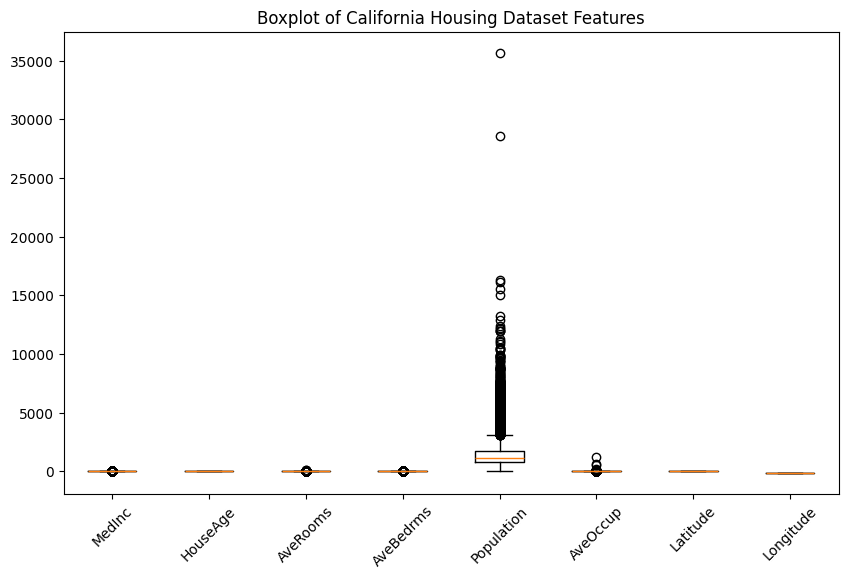

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
data = fetch_california_housing()
X = data.data

# Visualize potential outliers using boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(X)
plt.xticks(range(1, X.shape[1] + 1), data.feature_names, rotation=45)
plt.title("Boxplot of California Housing Dataset Features")
plt.show()

## Step 2: Data Preprocessing and Outlier Detection
Next, we preprocess the data by standardizing the features to have a mean of 0 and a standard deviation of 1. We then fit a linear regression model to the standardized data, make predictions, and calculate residuals. Outliers are detected based on a threshold derived from the standard deviation of residuals.

In [4]:
# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Make predictions and calculate residuals
y_pred = model.predict(X_scaled)
residuals = y - y_pred

# Set residual threshold for outlier detection
outlier_threshold = 3 * residuals.std()

# Detect outlier indices
outlier_idx = (residuals < -outlier_threshold) | (residuals > outlier_threshold)

## Step 3: Handling Outliers
Once outliers are identified, we create a new dataset with outliers removed. This step allows us to build a more robust model by eliminating the influence of extreme data points.

In [5]:
# Create a new dataset with outliers removed
X_filtered = X_scaled[~outlier_idx]
y_filtered = y[~outlier_idx]

## Step 4: Retraining the Model
Finally, we retrain the linear regression model on the filtered data, which results in an improved model that is less affected by outliers.

In [6]:
# Retrain the model on the filtered data
model.fit(X_filtered, y_filtered)

LinearRegression()

This example showcases how to apply outlier detection and handling techniques to a real-world dataset, but **these principles can be adapted to various data analysis and modeling tasks.**

## Conclusion
Outliers can significantly impact the performance of machine learning models. This guide covered key methods like visualization, standard deviation, interquartile ranges, proximity-based models, and robust statistical techniques to effectively detect outliers in both univariate and multivariate data in Python. We also discussed strategies like deletion, imputation, capping, robust methods, and weighting to appropriately handle outliers. With a sound understanding of outlier detection and treatment, practitioners can build more reliable, resilient, and accurate data pipelines and models.

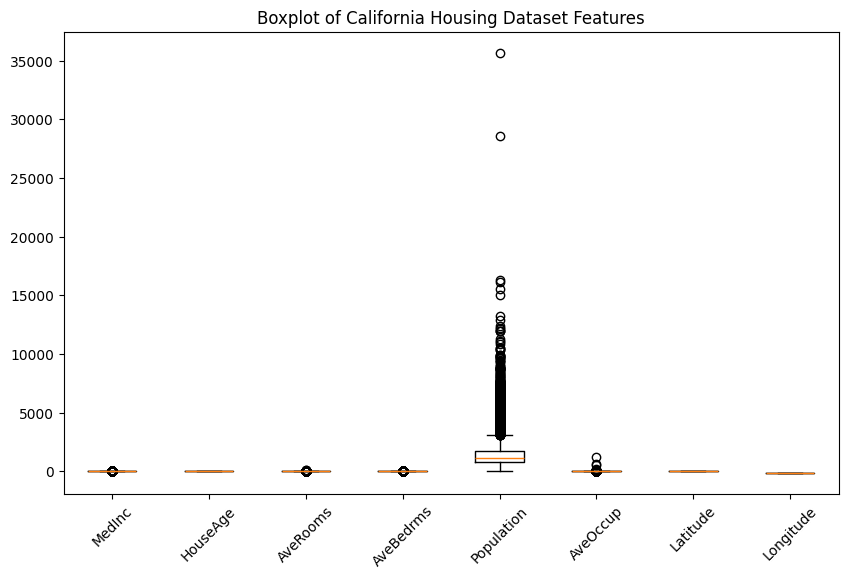

Number of outliers: 346
Improved Model R-squared: 0.6719441081344166


In [3]:
#THE COMPLEETE CODE
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Visualize potential outliers using boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(X)
plt.xticks(range(1, X.shape[1] + 1), data.feature_names, rotation=45)
plt.title("Boxplot of California Housing Dataset Features")
plt.show()

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Make predictions and calculate residuals
y_pred = model.predict(X_scaled)
residuals = y - y_pred

# Set residual threshold for outlier detection
outlier_threshold = 3 * residuals.std()

# Detect outlier indices
outlier_idx = (residuals < -outlier_threshold) | (residuals > outlier_threshold)

# Create a new dataset with outliers removed
X_filtered = X_scaled[~outlier_idx]
y_filtered = y[~outlier_idx]

# Retrain the model on the filtered data
model.fit(X_filtered, y_filtered)

# Print the number of outliers and the improved model's R-squared score
print("Number of outliers:", np.sum(outlier_idx))
print("Improved Model R-squared:", model.score(X_filtered, y_filtered))